In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv(r"C:\Users\amanr\Downloads\Advertising.csv", index_col=0,header=0)
data.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [3]:
print(data.dtypes)
print(data.shape)
print(data.describe())

TV           float64
radio        float64
newspaper    float64
sales        float64
dtype: object
(200, 4)
               TV       radio   newspaper       sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   14.022500
std     85.854236   14.846809   21.778621    5.217457
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   10.375000
50%    149.750000   22.900000   25.750000   12.900000
75%    218.825000   36.525000   45.100000   17.400000
max    296.400000   49.600000  114.000000   27.000000


In [4]:
data.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

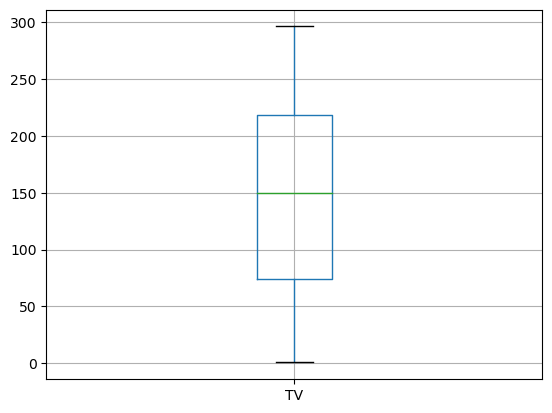

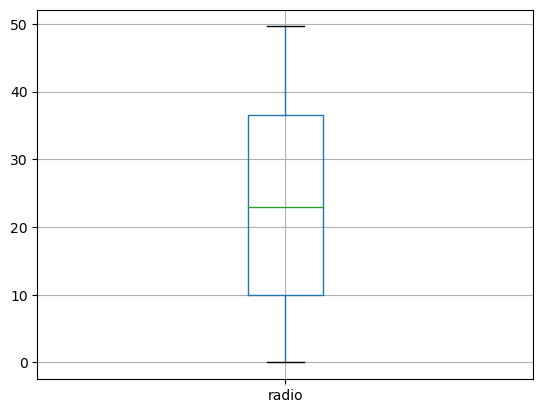

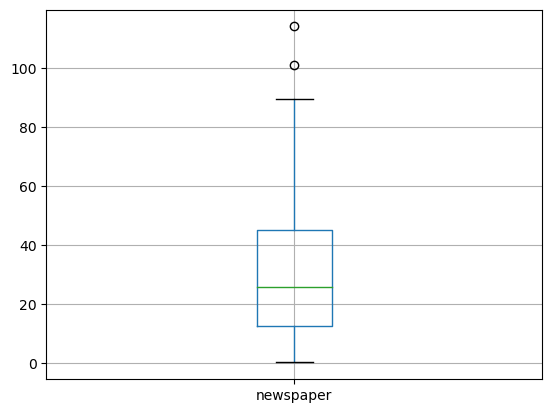

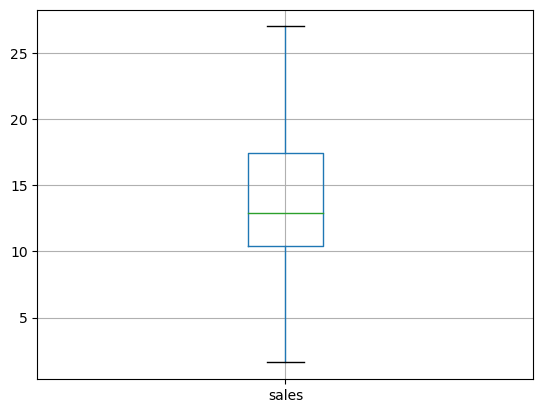

In [5]:
#Assumption 1: There should be no outliers in the data.
#check using boxplor.
for i in data.columns:
    data.boxplot(column=i)
    plt.show()

In the above box plot: The newspaper variable shows to outlier but since they are periodlic placed after the viscor line we will assume that these are the real values and not data entry errors

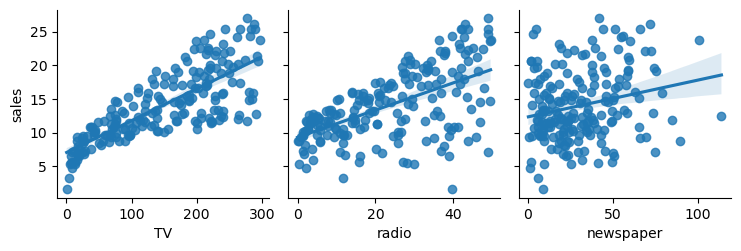

In [6]:
#Assumption 2:Assumption of Linearity:Every ind var should have a 
#linear relationship with the dep var.

sns.pairplot(data,x_vars=['TV', 'radio', 'newspaper'],
             y_vars="sales", kind='reg')
plt.show()

Newpaper doest not show a linear relationship with the dependetnt variable so we can ideally drop it
#data.drop(["newspaper"]),axis=1,inplace=True)

loc-label based
iloc-index based
loc[inc:inc]
iloc[inc:exc]
X=df.iloc[:,0:3]
Y=df.iloc[:,-1]

In [7]:
#create X and Y
X = data[['TV', 'radio', 'newspaper']]
Y = data['sales']
#X=data.iloc[:,0:-1]
#Y=data.iloc[:,-1]

In [8]:
print(X.shape)
print(Y.shape)

(200, 3)
(200,)


In [9]:
import warnings 
warnings.filterwarnings("ignore")

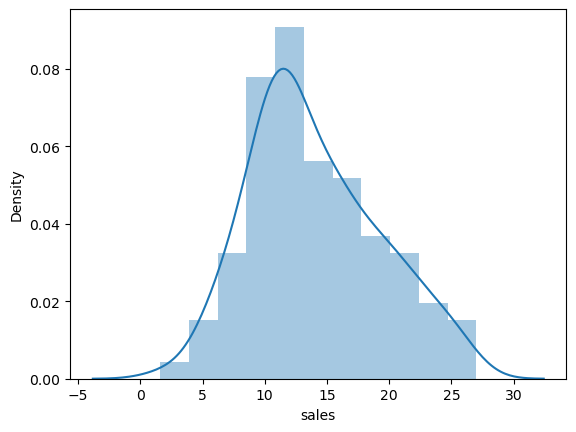

In [10]:
#Assumption of Normality:The dependent variable should follow an approximate normal distribution
sns.distplot(Y)
plt.show()

# We can try remove skewness using two ways:
    1.Remove outliers
    2.log transform data(to reduce skewness)

In [11]:
"""
#log transformation
import numpy as np
Y_log=np.log(Y)
"""

'\n#log transformation\nimport numpy as np\nY_log=np.log(Y)\n'

If the y variable is highly skewed we can log transform the data once to reduce the skewness

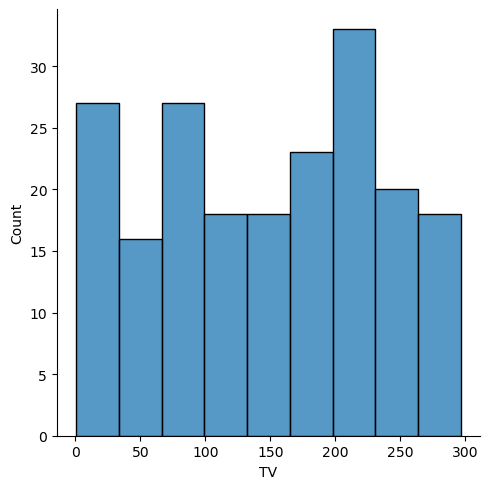

In [12]:
sns.displot(data["TV"])   #bins-to divide the variable in 20 bars
plt.show()

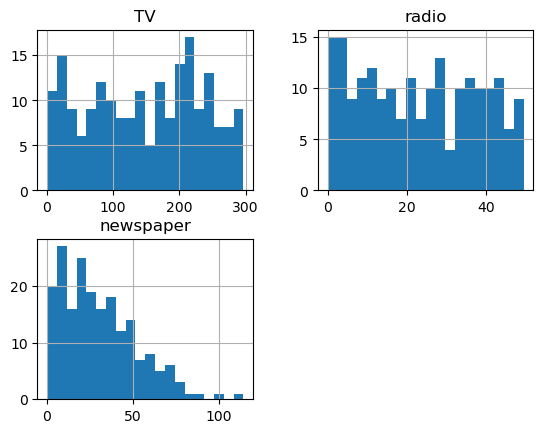

In [13]:
X.hist(bins=20)
plt.show()

In [14]:
from scipy.stats import skew
#finding the skewness in each variable
data_num_skew = X.apply(lambda i: skew(i.dropna()))
#subsetting the variables that are highly skewed
data_num_skewed = data_num_skew[(data_num_skew > .75) | (data_num_skew < -.75)]

print(data_num_skew)
print(data_num_skewed)
import numpy as np
# apply log + 1 transformation for all numeric features with skewness over .75
X[data_num_skewed.index] = np.log1p(X[data_num_skewed.index]) 
#log1p-to ensure that we do not get infinite values

TV          -0.069328
radio        0.093467
newspaper    0.887996
dtype: float64
newspaper    0.887996
dtype: float64


                 TV     radio  newspaper
TV         1.000000  0.054809   0.030951
radio      0.054809  1.000000   0.251909
newspaper  0.030951  0.251909   1.000000


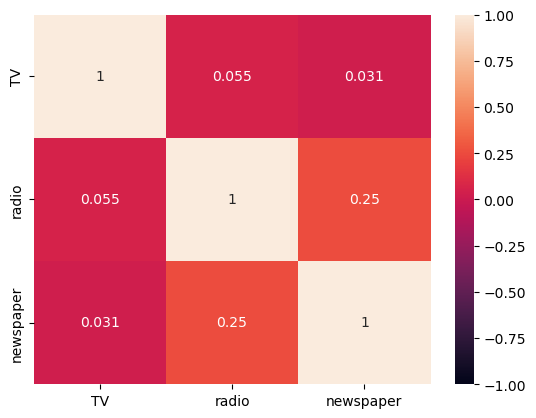

In [15]:
# Y and X is level log model because log is used in X but not on Y

# Assumption of no multicollinerity: There should be no multicollinearity
# between the independent variables
# multicollinerity is the relationship amongst the independent variables

corr_df = X.corr(method = "pearson")
print(corr_df)

sns.heatmap(corr_df,vmax=1.0,vmin=-1.0,annot=True)
plt.show()

# Variance Inflation Factor(VIF)=1/1-R^2
#To check whether all the independent variables are related or not,they shouyld not be related
#1st
#TV-DV
#Radio,Newspaper-IV
#if R^2=0.2 then VIF is low and vice versa
An acceptable VIF value is less thyan or equal to 5 but VIF greater than 5 is not acceptable(multicollinearity)
Lets assume VIF value pof all the variables is above 5 suppose 10 so it is depends on the situation also

In [16]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

vif_df = pd.DataFrame()
vif_df["features"] = X.columns
vif_df["VIF Factor"] = [vif(X.values, i) for i in range(X.shape[1])]        #list comprehension
vif_df.round(2)

,features,VIF Factor
0,TV,3.39
1,radio,3.63
2,newspaper,5.44


In [17]:
#x.drop("newspaper",axis=1,inplace=true)
#return the VIF code

In [18]:
#when we have data <1000 values we use 80% for training and 20% for testing 
#when we have data >1000 values we use 70% for training and 30% for testing
from sklearn.model_selection import train_test_split

#Split the data into test and train
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, 
                                                    random_state=10)  

 

print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)
print("Percent of train data",X_train.shape[0]/X.shape[0]*100)

(160, 3)
(160,)
(40, 3)
(40,)
Percent of train data 80.0


# Rules to build model
* create the model objective
  obj=AlgoName()
Linear Model-LinerRegression,Logistics Regression
Tree-Decision Tree,Random forest
Neighbour-KNN classifier,KNN regression
* Train the model 
 obj.fit(X_train,Y_train)
* Predict using the model
 Y_pred=obj.predict(X_test)

In [19]:
from sklearn.linear_model import LinearRegression
#create a model object
lm = LinearRegression()
#train the model object
lm.fit(X_train,Y_train)

# print intercept and coefficients
print(lm.intercept_)
print(lm.coef_)



3.3532913858151527
[ 0.0437425   0.19303708 -0.04895137]


In [20]:
#pair the feature names with the coefficients
print(list(zip(X.columns, lm.coef_)))

[('TV', 0.04374250157742165), ('radio', 0.19303707897345299), ('newspaper', -0.048951368222488065)]


In [23]:
x1=100
x2=100
x3=np.log1p(0)
Y_predicted=3.3532913858151527+(0.04374250157742165*x1)+(0.19303707897345299*x2)+(-0.048951368222488065*x3)
print(Y_predicted)

27.031249440902616


In [26]:
#predict using the model
Y_predicted=lm.predict(X_test)
print(Y_predicted)

[18.15026866 12.96136899 18.05815332 23.66025079 20.68751041 14.26325872
 14.92774472 21.38847375 21.14752911 12.75788534 23.99735583  7.20632737
 12.30777109 19.22813333 19.41581583 13.44985803 19.62619644  9.24667496
 21.1052867  20.87838433 15.52611251 10.91695579 22.82910679 15.82915597
 17.40742204  8.17170435 11.88738387 12.69866637 21.71275044  7.94920205
 12.49118989 20.43292079  4.71443086  4.72126238 16.7504848  15.74384945
  6.74775596 17.73750244  9.01170001 13.60841593]


In [27]:
new_df=pd.DataFrame()
new_df=X_test.copy()
new_df["Actual Sales"]=Y_test
new_df["Predicted Sales"]=Y_predicted
new_df=new_df.reset_index().drop("index", axis=1)


In [28]:
new_df

,TV,radio,newspaper,Actual Sales,Predicted Sales
0,210.7,29.5,2.332144,18.4,18.150269
1,8.7,48.9,4.330733,7.2,12.961369
2,218.4,27.7,3.996364,18.0,18.058153
3,283.6,42.0,4.207673,25.5,23.660251
4,216.4,41.7,3.703768,22.6,20.687510
5,147.3,23.9,3.000720,14.6,14.263259
6,188.4,18.1,3.280911,14.9,14.927745
7,198.9,49.4,4.110874,23.7,21.388474
8,216.8,43.9,3.339322,22.3,21.147529
9,17.2,45.9,4.252772,9.3,12.757885


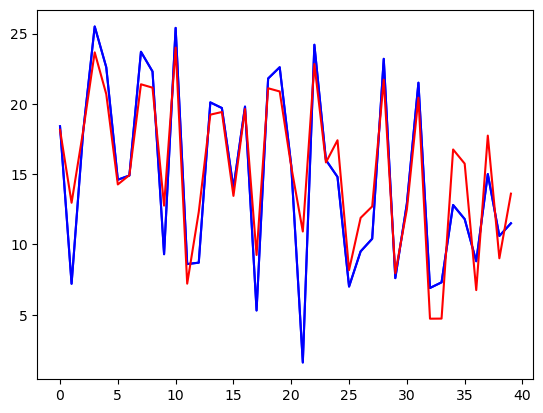

In [31]:
new_df["Actual Sales"].plot(c='blue')
new_df["Predicted Sales"].plot(c='red')
plt.show()


R^2 indicates how much of variability  in the y are we able to express on the basis of X
0<R^2<1
If R^2 is close to 1, it is ideal model
If R^2 is close to 0.5,it is that model needs improvement
If the R^2 is close to 0, it is poor model
(Mean model would have performed equivalently)
If R^2<0, discard the model
(Mean model would have performed better)
"""

# Adjusted R^2
Adjusted R^2=1-(1-R^2)(N-1)/(N-p-1) where 
N-no. of observation
P-no. of predictors(IV)
R^2 has a drawback that it keeps on increasing as we add more variables to the model,
but adjusted R^2 will only increase if we add significant variables to the model
Adjusted R^2 is penalized R^2 value
If R^2 =0.85,Adj R^2=0.84/0.83-ideal model
(R^2 is close to 1, Adj R^2 is also close to R^2)
If R^2=0.85,AdjR^2=0.8/0.78-needs improvement
If R^2=0.4,AdjR^2=0.32-poor model
Adj R^2 will always be lesser than R^2. More reliable value to the client.




In [35]:
lm.score(X_train,Y_train)
#Y_pred=lm.predict(X_train)
#score=r2_score(X_train,Y_predicted)

0.9208986647500219

In [36]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np

r2=r2_score(Y_test,Y_pred)
print("R-squared:",r2)

rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print("RMSE:",rmse)

adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)

 

R-squared: 0.834801071903532
RMSE: 2.59297691109306
Adj R-square: 0.8322725168816474


In [37]:
print(Y_test.min())
print(Y_test.max())


1.6
25.5


In [39]:
new_df["Deviation"]=new_df["Actual Sales"]-new_df["Predicted Sales"]
new_df.to_excel("Sales Prediction.xlsx",header=True,index=True)
new_df.head()
                                                

,TV,radio,newspaper,Actual Sales,Predicted Sales,Deviation
0,210.7,29.5,2.332144,18.4,18.150269,0.249731
1,8.7,48.9,4.330733,7.2,12.961369,-5.761369
2,218.4,27.7,3.996364,18.0,18.058153,-0.058153
3,283.6,42.0,4.207673,25.5,23.660251,1.839749
4,216.4,41.7,3.703768,22.6,20.687510,1.912490


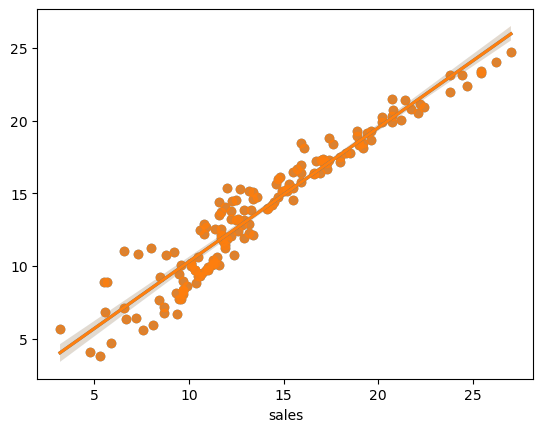

In [41]:
sns.regplot(x=Y_train,y=lm.predict(X_train),ci=95)
plt.show()

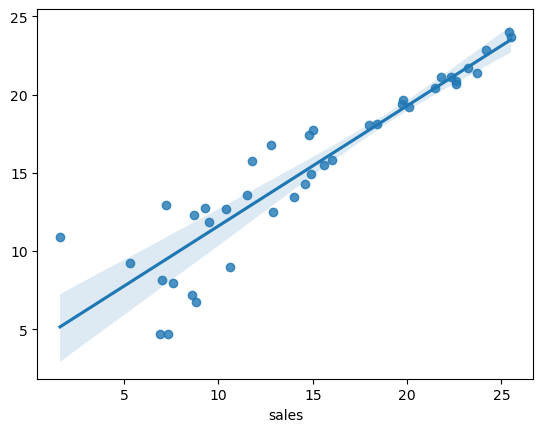

In [42]:
sns.regplot(x=Y_test,y=lm.predict(X_test),ci=95)
plt.show()

In [ ]:
Tuning
* Feature Selection-domain lknowldege,in built-feature selection techniques
* Dedicated approach-Regularization techniques-Ridge, Lasso
* Stochastic Gradient descent(Ml Approach)

# Ridge Regression:
It identifies the insignificant variables in the model and resuces there Beta(B) values such that the overall impact of
these variables on the model is reduced

y=B0 + B1.X1 + B2.X2 + B3.X3 + B4.X4
x2=low 
low.x4=low


# Lasso:
    Least Absolute Shrinkage and selection opefrator-L1
    y=B0 + B1.X1 + B2.X2 + B3.X3 + B4.X4
                0.x2=0             0.X4=0
Lasso regression identifies the insignificant variables in the model and forces there Beta(B) values to be zero such that the 
overall impact of these variables on the model is eliminated